In [4]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 109.5/109.5 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd 

import pandas_datareader.data as web

# visualization
import matplotlib.pyplot as plt

# do not show Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [6]:
gdp = web.DataReader(name='GDP', data_source='fred', start='1980-1', end='2023-12' )
gdp

,GDP
DATE,
1980-01-01,2789.842
1980-04-01,2797.352
1980-07-01,2856.483
1980-10-01,2985.557
1981-01-01,3124.206
...,...
2022-10-01,26734.277
2023-01-01,27164.359
2023-04-01,27453.815


In [7]:
gdp.index = pd.period_range(start='1980Q1', end='2023Q4', freq='Q')
gdp

,GDP
1980Q1,2789.842
1980Q2,2797.352
1980Q3,2856.483
1980Q4,2985.557
1981Q1,3124.206
...,...
2022Q4,26734.277
2023Q1,27164.359
2023Q2,27453.815
2023Q3,27967.697


<AxesSubplot:>

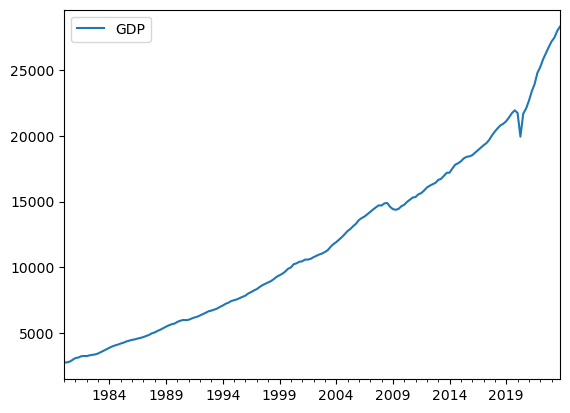

In [8]:
gdp.plot()

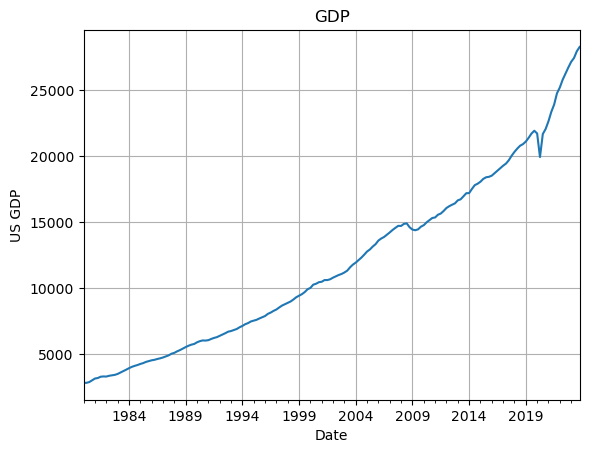

In [9]:
ax = gdp.plot(title='GDP')
# label for oX
ax.set_xlabel('Date')
# label for OY
ax.set_ylabel('US GDP')
# add a grid
ax.grid()
# legend removing
ax.legend().remove()

plt.show()

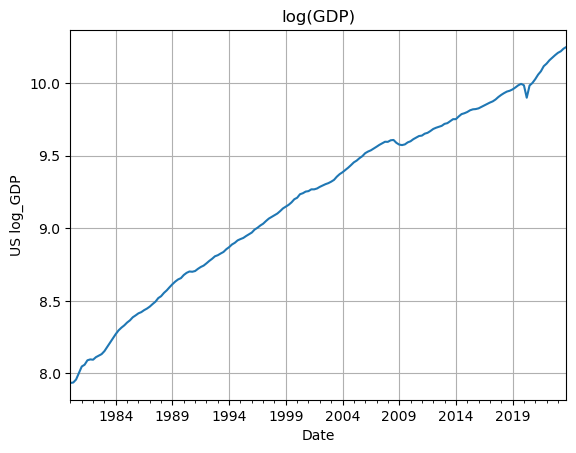

In [10]:
ax = np.log(gdp).plot(title='log(GDP)')
# label for oX
ax.set_xlabel('Date')
# label for OY
ax.set_ylabel('US log_GDP')
# add a grid
ax.grid()
# legend removing
ax.legend().remove()

plt.show()

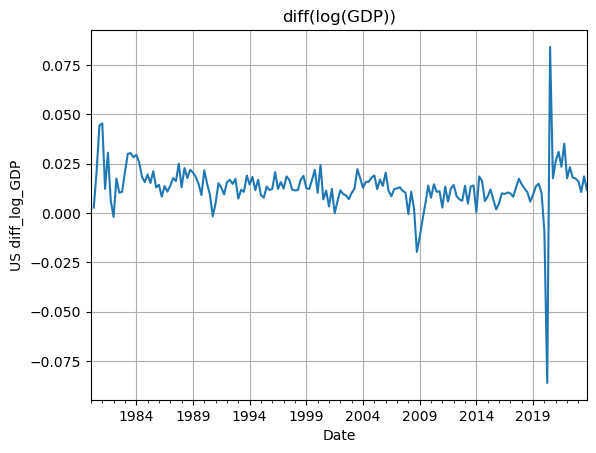

In [11]:
ax = np.log(gdp).diff().plot(title='diff(log(GDP))')
# label for oX
ax.set_xlabel('Date')
# label for OY
ax.set_ylabel('US diff_log_GDP')
# add a grid
ax.grid()
# legend removing
ax.legend().remove()

plt.show()

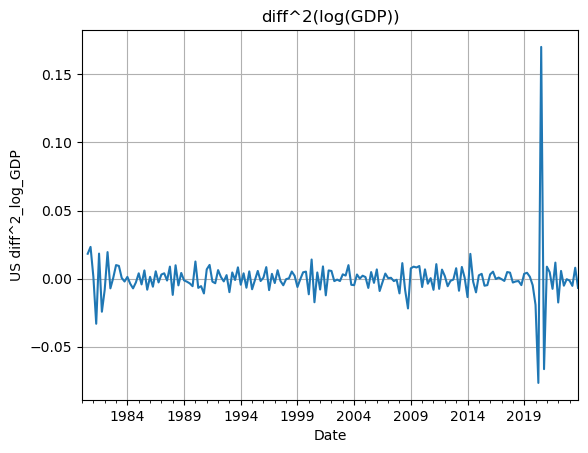

In [12]:
ax = np.log(gdp).diff().diff().plot(title='diff^2(log(GDP))')
# label for oX
ax.set_xlabel('Date')
# label for OY
ax.set_ylabel('US diff^2_log_GDP')
# add a grid
ax.grid()
# legend removing
ax.legend().remove()

plt.show()

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='GDP', ylabel='Count'>

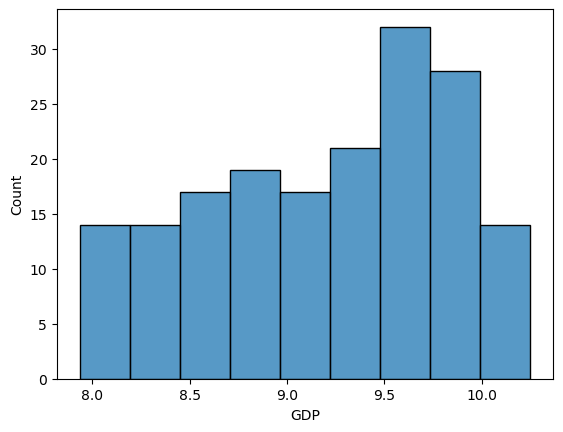

In [14]:
sns.histplot(data=np.log(gdp),x='GDP')

In [15]:
y=np.log(gdp)
y['lag']=y.shift()

<AxesSubplot:xlabel='GDP', ylabel='lag'>

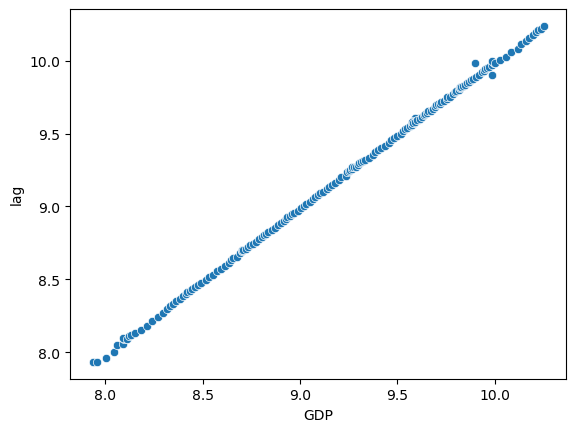

In [16]:
sns.scatterplot(data=y,x='GDP',y='lag')

In [17]:
y.corr()

,GDP,lag
GDP,1.000000,0.999809
lag,0.999809,1.000000


In [18]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 101.1/101.1 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
     ------------------------------------- 939.5/939.5 kB 11.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=a684ea78478aa9364436df0c30dae1dc5b3a1968c04377c2d55aecdc999b4ae6
  Stored in directory: c:\users\student\appda

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [19]:
import yfinance as yf

In [21]:
sp= yf.download(tickers='^GSPC', start='1995-01-01',end='2023-12-23')
sp

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
1995-01-03 00:00:00+00:00,459.109985,459.109985,459.269989,457.200012,459.209991,262450000
1995-01-04 00:00:00+00:00,460.709991,460.709991,460.720001,457.559998,459.130005,319510000
1995-01-05 00:00:00+00:00,460.339996,460.339996,461.299988,459.750000,460.730011,309050000
1995-01-06 00:00:00+00:00,460.679993,460.679993,462.489990,459.470001,460.380005,308070000
1995-01-09 00:00:00+00:00,460.829987,460.829987,461.769989,459.739990,460.670013,278790000
...,...,...,...,...,...,...
2023-12-18 00:00:00+00:00,4740.560059,4740.560059,4749.520020,4725.580078,4725.580078,4060340000
2023-12-19 00:00:00+00:00,4768.370117,4768.370117,4768.689941,4743.720215,4743.720215,4026970000


<AxesSubplot:xlabel='Date'>

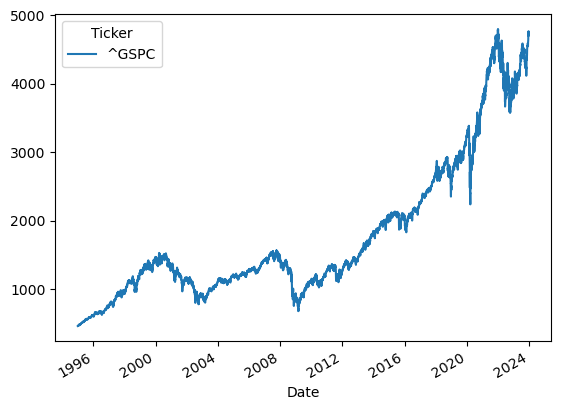

In [22]:
y=sp['Close']
y.plot()

<AxesSubplot:title={'center':'log(y)'}, xlabel='Date'>

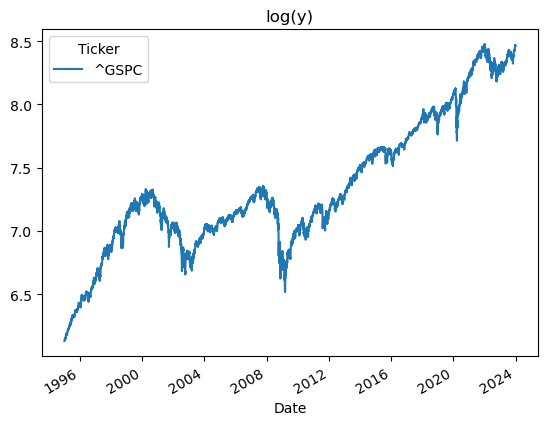

In [23]:
np.log(y).plot(title='log(y)')

<AxesSubplot:title={'center':'diff(log(y))'}, xlabel='Date'>

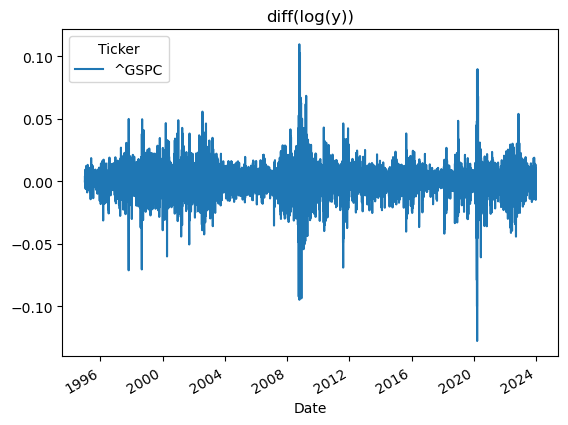

In [24]:
np.log(y).diff().plot(title='diff(log(y))')

In [25]:
y=np.log(gdp)

In [26]:
pip install sktime

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 36.7/36.7 MB 9.8 MB/s eta 0:00:00
     -------------------------------------- 137.4/137.4 kB 7.9 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
from sktime.transformations.series.acf import AutoCorrelationTransformer, PartialAutoCorrelationTransformer
from sktime.utils.plotting import plot_correlations

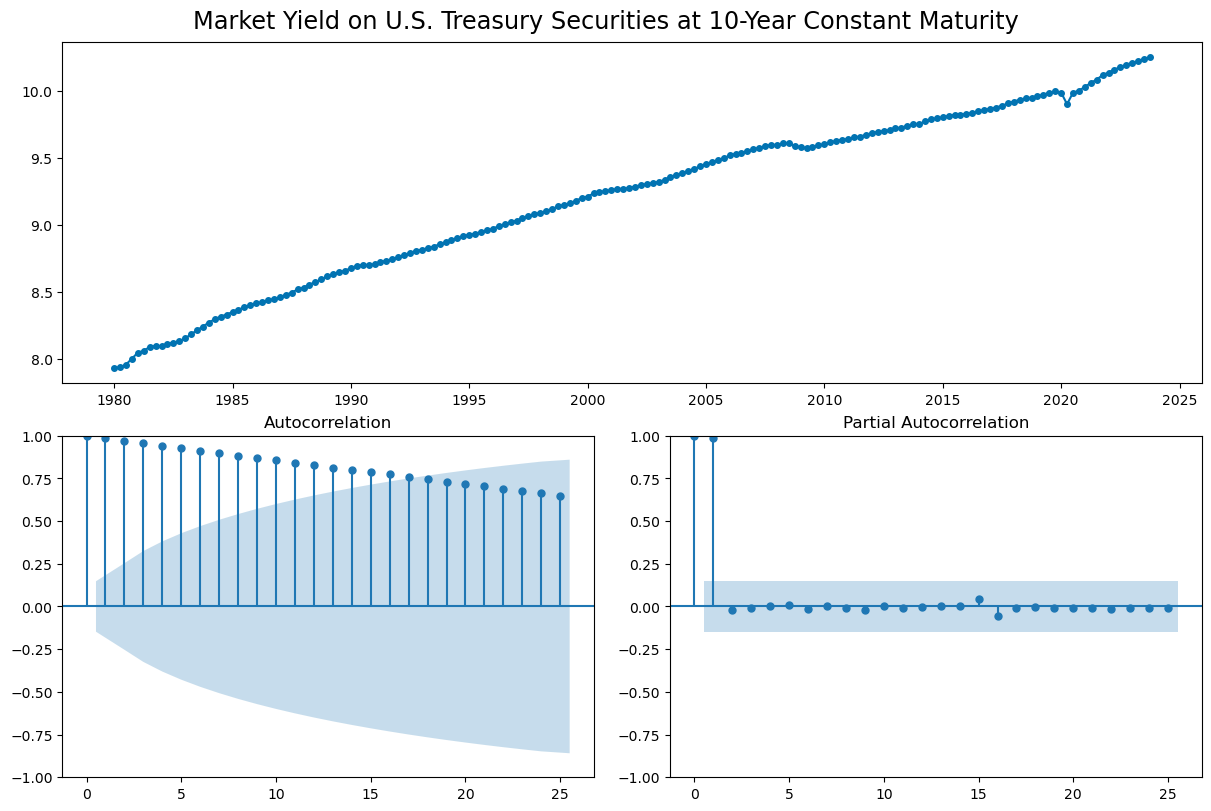

In [29]:
plot_correlations(y, lags=25, zero_lag=True, alpha=0.05, suptitle='Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity')

plt.show()

In [28]:
transformer = AutoCorrelationTransformer(n_lags=5)
acf = transformer.fit_transform(y)
acf

,GDP
0,1.000000
1,0.979716
2,0.959191
3,0.938843
4,0.919007
5,0.899825


The third value of autocorrelation function does not belong to the cofidence interval $Rightarrow$ it is significant

In [30]:
transformer = PartialAutoCorrelationTransformer(n_lags=5)
pacf = transformer.fit_transform(y)
pacf

,GDP
0,1.000000
1,0.985315
2,-0.021564
3,-0.007286
4,0.004242
5,0.009237


In [31]:
from statsmodels.tsa.api import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [32]:
acf(y, nlags=7).round(3)

array([1.   , 0.98 , 0.959, 0.939, 0.919, 0.9  , 0.881, 0.862])

In [33]:
pacf(y, nlags=7).round(3)

array([ 1.   ,  0.985, -0.022, -0.007,  0.004,  0.009, -0.012,  0.002])

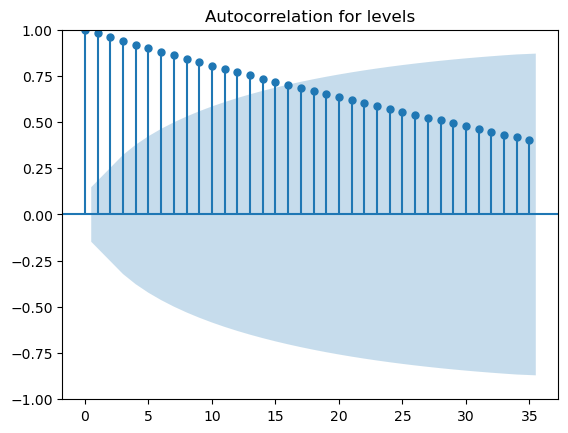

In [34]:
plot_acf(y, lags=35, alpha=0.05, title='Autocorrelation for levels')

plt.show()

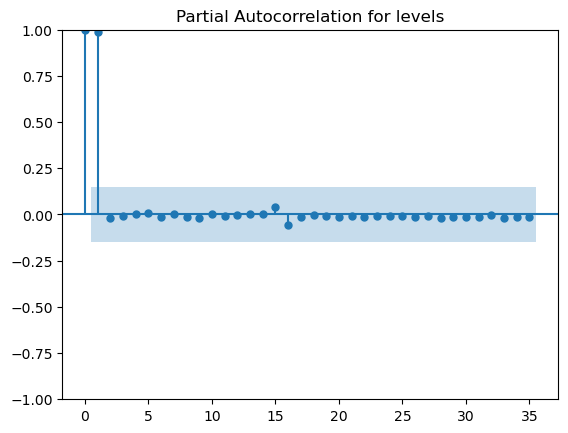

In [35]:
plot_pacf(y, lags=35, alpha=0.05, title='Partial Autocorrelation for levels')

plt.show()

In [37]:
dy = y.diff().dropna()


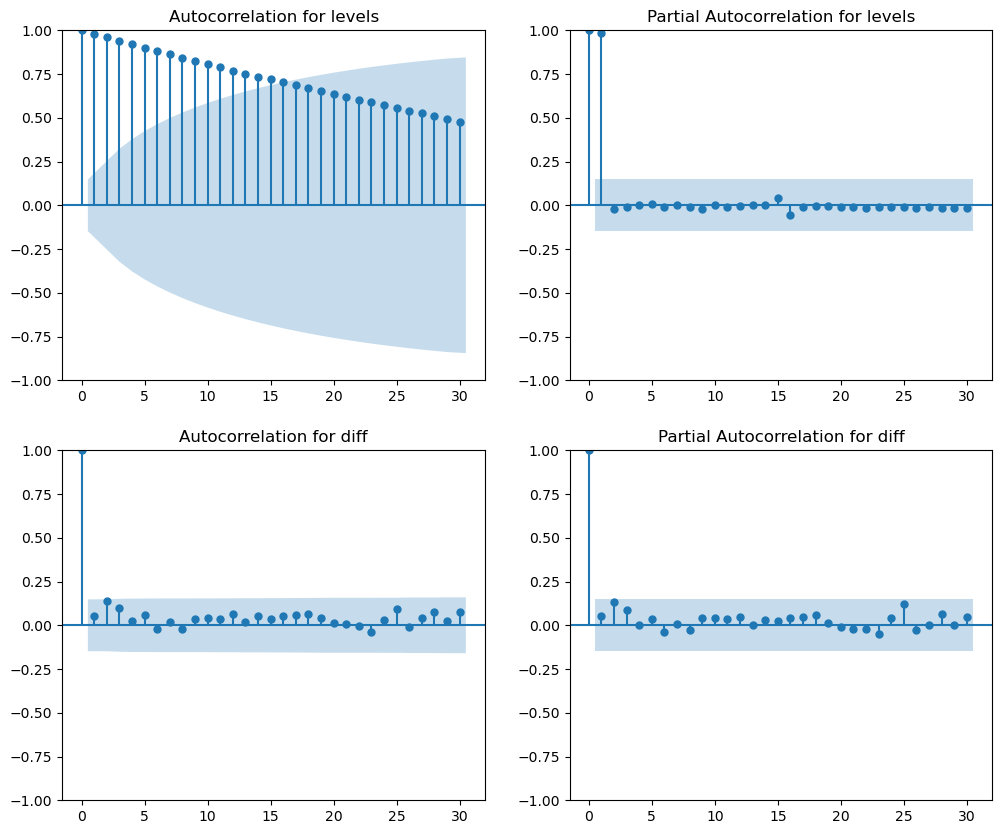

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

plot_acf(y, ax=axs[0,0], lags=30, alpha=0.05, title='Autocorrelation for levels')
plot_pacf(y, ax=axs[0, 1], lags=30, alpha=0.05, title='Partial Autocorrelation for levels')

plot_acf(dy, ax=axs[1,0], lags=30, alpha=0.05, title='Autocorrelation for diff')
plot_pacf(dy, ax=axs[1, 1], lags=30, alpha=0.05, title='Partial Autocorrelation for diff')

plt.show()